In [44]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [12]:
#creating data frame

df = pd.read_csv('Expanded_data_with_more_features.csv')

In [14]:
#printing our first 5 data elements

df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [15]:
#data description

df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [35]:
#checking data types and non-null value in our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               30641 non-null  object 
 1   EthnicGroup          28801 non-null  object 
 2   ParentEduc           28796 non-null  object 
 3   LunchType            30641 non-null  object 
 4   TestPrep             28811 non-null  object 
 5   ParentMaritalStatus  29451 non-null  object 
 6   PracticeSport        30010 non-null  object 
 7   IsFirstChild         29737 non-null  object 
 8   NrSiblings           29069 non-null  float64
 9   TransportMeans       27507 non-null  object 
 10  WklyStudyHours       29686 non-null  object 
 11  MathScore            30641 non-null  int64  
 12  ReadingScore         30641 non-null  int64  
 13  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 3.3+ MB


In [33]:
#checking null values

df.isnull().sum()

Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

Drop unamed column

#deleting first useless column

df = df.drop(['Unnamed: 0'], axis=1, inplace=True)


Gender distribution

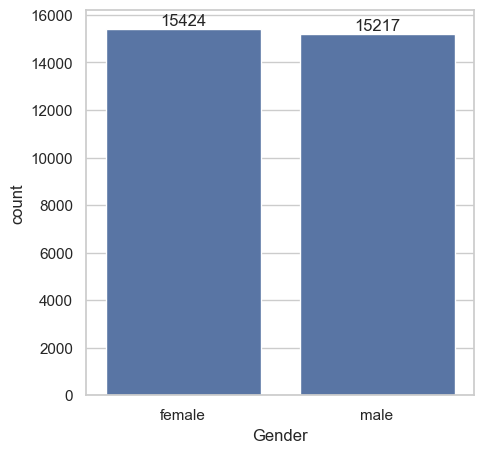

In [52]:
plt.figure(figsize = (5,5))
ax = sns.countplot(data = df, x = 'Gender')
ax.bar_label(ax.containers[0])
plt.show()


In [53]:
# form the above chart number of femalesis more than males

In [55]:
#impact of parents education in childern scores.

gb = df.groupby('ParentEduc').agg({"MathScore":'mean','ReadingScore':'mean','WritingScore':'mean'})
print(gb)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.390472     69.179708     68.501432
some high school    62.584013     65.510785     63.632409


<Axes: ylabel='ParentEduc'>

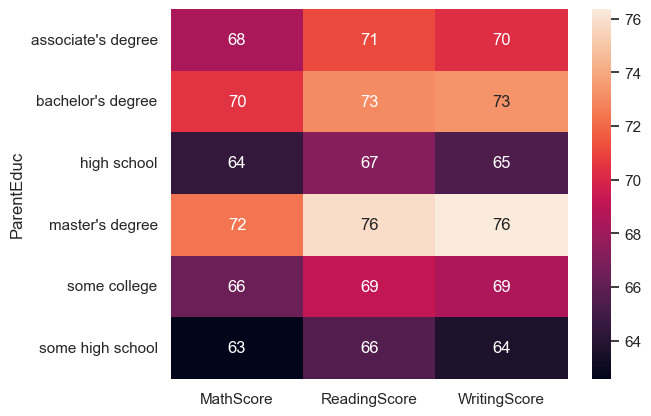

In [57]:
sns.heatmap(gb, annot=True)

In [58]:
#From the above chart we have concluded that parent education have high impact on student scores.

In [59]:
#impact of parents marital in childern scores.

gb = df.groupby('ParentMaritalStatus').agg({"MathScore":'mean','ReadingScore':'mean','WritingScore':'mean'})
print(gb)

                     MathScore  ReadingScore  WritingScore
ParentMaritalStatus                                       
divorced             66.691197     69.655011     68.799146
married              66.657326     69.389575     68.420981
single               66.165704     69.157250     68.174440
widowed              67.368866     69.651438     68.563452


<Axes: ylabel='ParentMaritalStatus'>

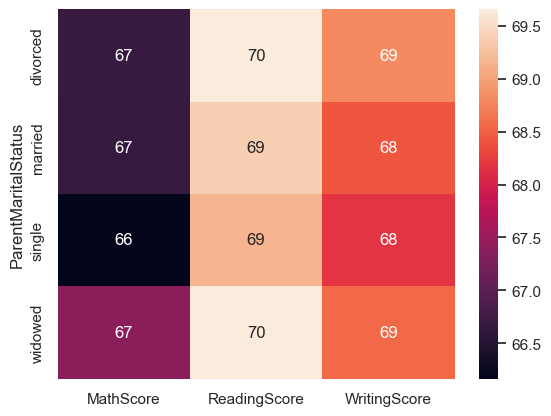

In [60]:
sns.heatmap(gb, annot=True)

In [61]:
#from above chart we have analyzed that parent marital status have no impact on children score

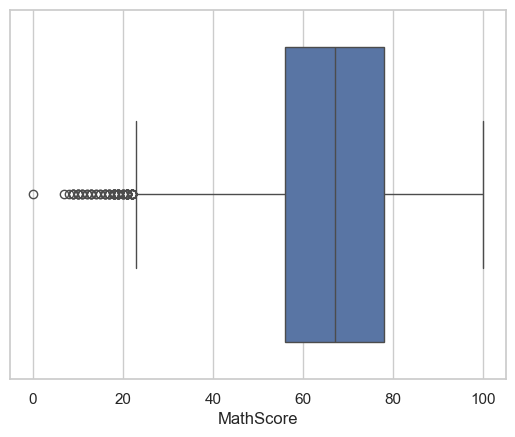

In [62]:
#checking outliers to analyze which subject is diffcult 

sns.boxplot(data = df, x = "MathScore")
plt.show()

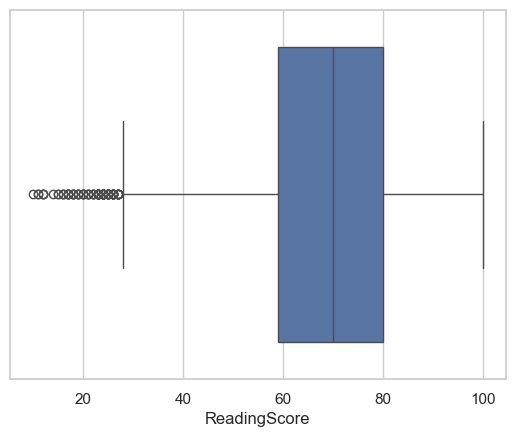

In [63]:
sns.boxplot(data = df, x = "ReadingScore")
plt.show()

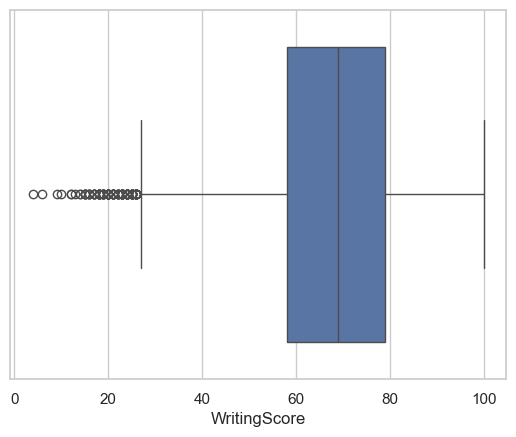

In [64]:
sns.boxplot(data = df, x = "WritingScore")
plt.show()

In [65]:
#from above charts we have analyzed that math is comparatively diffcult 
 

<function matplotlib.pyplot.show(close=None, block=None)>

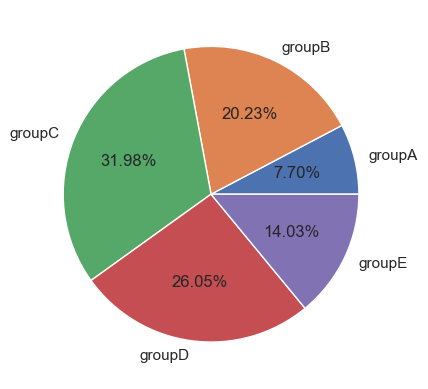

In [71]:
groupA = df.loc[(df['EthnicGroup'] == "group A")].count()
groupB = df.loc[(df['EthnicGroup'] == "group B")].count()
groupC = df.loc[(df['EthnicGroup'] == "group C")].count()
groupD = df.loc[(df['EthnicGroup'] == "group D")].count()
groupE = df.loc[(df['EthnicGroup'] == "group E")].count()

l = ['groupA','groupB','groupC','groupD','groupE']
mlist = (groupA['EthnicGroup'],groupB['EthnicGroup'],groupC['EthnicGroup'],groupD['EthnicGroup'],groupE['EthnicGroup'])

plt.pie(mlist, labels = l, autopct = "%1.2f%%")
plt.show


In [72]:
#from the above chart we have analyzed that group c has the highest EthnicGroup

[Text(0, 0, '9212'),
 Text(0, 0, '5826'),
 Text(0, 0, '2219'),
 Text(0, 0, '7503'),
 Text(0, 0, '4041')]

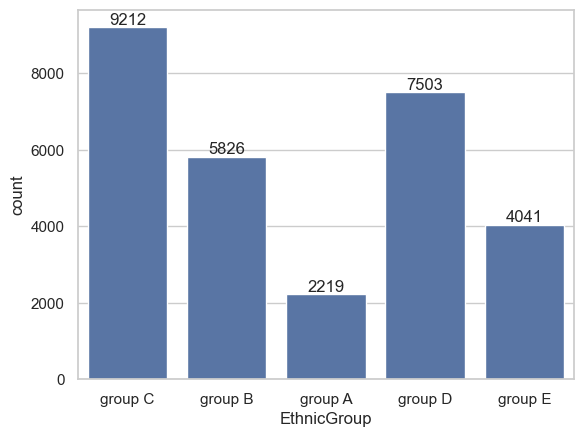

In [75]:
ax = sns.countplot(data = df, x ='EthnicGroup')
ax.bar_label(ax.containers[0])